In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14
from IPython.display import display_html 
import pandas as pd

In [2]:
# random seed for reproducibility
np.random.seed(12345)

# size of dataset
N = 10000
# number of block for one-hot encoding
G = 5
# number of categories
A = 4
# number of categories of kind 0
A0 = int(A/2)
# number of categories of kind 1
A1 = A-A0
#
AA = [A0, A1]
# size of each data point
L = G*A
#  
# Noise: probability q to change category
q = -0.1  # 0.1 then 
#
a = 0.6
print(f"L={L}, A={A}, G={G}")

x,y = np.zeros((N,L)).astype(int), np.zeros(N).astype(int)

for n in range(N):
    # kind of the first slot
    k = np.random.randint(0,2)
    # label
    y[n] = k
    i0=0
    for g in range(G):
        # normal choice
        i = np.random.randint(0, AA[k])
        j = i + i0 + k*A0
        if np.random.random()<q:
            # normal choice
            i = np.random.randint(0,A)
            j = i + i0
        
        if(n<2): 
            print(f"k={k}, g={g}, i0={i0}, i={i}, j={j}, AA[k]={AA[k]}")
        # one-hot encoding
        x[n][j] = 1
        i0= i0 + A
        k = 1 - k
                
    if(n<3): print(x[n], y[n])

print("...")    

L=20, A=4, G=5
k=0, g=0, i0=0, i=1, j=1, AA[k]=2
k=1, g=1, i0=4, i=0, j=6, AA[k]=2
k=0, g=2, i0=8, i=0, j=8, AA[k]=2
k=1, g=3, i0=12, i=1, j=15, AA[k]=2
k=0, g=4, i0=16, i=1, j=17, AA[k]=2
[0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0] 0
k=1, g=0, i0=0, i=1, j=3, AA[k]=2
k=0, g=1, i0=4, i=0, j=4, AA[k]=2
k=1, g=2, i0=8, i=1, j=11, AA[k]=2
k=0, g=3, i0=12, i=1, j=13, AA[k]=2
k=1, g=4, i0=16, i=1, j=19, AA[k]=2
[0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1] 1
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0] 1
...


#### Show generated data

In [3]:
def is_one(cell_value):
    color0 = 'background-color: blue; color: white'
    color1 = 'background-color: cyan;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=12
df0 = pd.DataFrame(x[:N1])

df0s = df0.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)

display_html(df0s._repr_html_(), raw=True)

df=df0
t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
6,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
8,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
6,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
8,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0


# For semplicity (still to understand...) we consider [-1, 1] encoding

In [4]:
# We name "v" for "visible" instead of using x
v = np.copy(x)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# sigmoid takes into account energy difference =2
GAP = 2 # is given by setting Energy levels = +- 1 and from the Boltzmann distribution getting a sigmoid function with coefficient 2 at the exponent
# convert 0,1 -> -1,1
v = 2*v - 1
vmin = -1

# RBM, number of hidden units
M = 6

# range of each initial weight
sigma = np.sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L, M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w[:3] =", w[:3])
print("a =", a[:3])
print('...')
w0, a0, b0 = np.copy(w), np.copy(a), np.copy(b)

w[:3] = [[-0.08029295  0.18785703 -0.20374063 -0.21797536  0.77104258  0.54653873]
 [ 0.03644147  0.11050993  0.30163547  0.48889193  0.39505217 -0.50841975]
 [ 0.10786059  0.08978702  0.53065764  0.34768619 -0.78510675 -0.14584864]]
a = [-0.88361978 -0.45766925  0.13869612]
...


#### Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


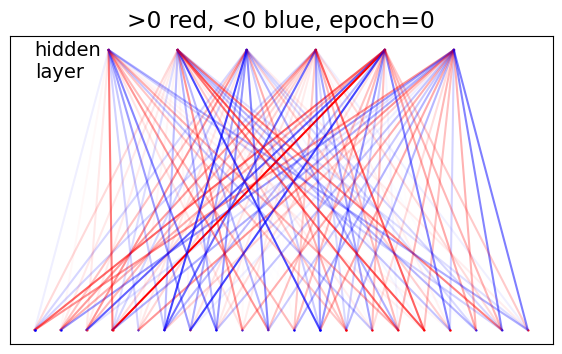

In [5]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

# def plotgraph_vert(epoch=0):
#     A=1./np.linalg.norm(w, axis=1) ## L2-norm    # before was 2./w.max()
#     for i in range(L):
#         for j in range(M):
#             ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
#             plt.plot(ex, ey, col, zorder=1, lw=np.abs(A*w)[i][j])
#     # Scatter plot on top of lines
    
#     A_a = 1./(np.linalg.norm(a))    # 300./(a.max()+b.max())
#     A_b = 1./(np.linalg.norm(b))
#     for i in range(L):
#         plt.scatter(x1[i], y1[i], s=A_a*abs(a[i]), zorder=2, c=mycolor(a[i]))

#     for j in range(M):
#         plt.scatter(x2[j], y2[j], s=A_b*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
#     plt.figaspect(1)
#     plt.title(f'>0 red, <0 blue, epoch={epoch}')
#     plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(7, 4))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min()) ## L2-norm; before it was A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*np.abs(w[i][j]))
    # Scatter plot on top of lines

    # A=1./(np.linalg.norm(a+b, axis=1))    # 500
    A = 300.    
    for i in range(L):
        ax.scatter(y1[i], x1[i], s=min(A, np.abs(a[i])), zorder=2, c=mycolor(a[i]))                 # small dots at the bottom
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(A, np.abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")     # these are the top squares
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [6]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in, wei, bias, DE, info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input =', v_in)
        print('act =', act)
        print('prob =', prob)
        print('output =', v_out)
    return v_out

k = 0
activate(v[k], w, b, GAP, info=True)

input = [-1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1]
act = [-0.49949145  1.75157813  1.59964106  1.94398951 -1.31216928  1.58169067]
prob = [0.26914144 0.97077744 0.96080725 0.97992457 0.06758836 0.95943276]
output = [-1  1  1  1 -1  1]


array([-1,  1,  1,  1, -1,  1])

## ADAM class

In [7]:
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = np.zeros((L, M)), np.zeros((L, M))
        self.m_da, self.v_da = np.zeros(L), np.zeros(L)
        self.m_db, self.v_db = np.zeros(M), np.zeros(M)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        
    def update(self, t, w, a, b, dw, da, db):
        ## dw, da, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db
        # *** biases of hidden units *** #
        self.m_da = self.beta1*self.m_da + (1-self.beta1)*da

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases of hidden units *** #
        self.v_da = self.beta2*self.v_da + (1-self.beta2)*(da**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db**2)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_da_corr = self.m_da/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_da_corr = self.v_da/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        a = a - self.eta*(m_da_corr/(np.sqrt(v_da_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        # m_dw, m_da, m_db = self.m_dw, self.m_da, self.m_db
        return w, a, b #, self.m_dw, self.m_da, self.m_db

In [8]:
def energy(a, v, b, h, w):
    return -a @ v - b @ h - v @ (w @ h)

def checkconvergence(w, w0):
    return np.allclose(w, w0)

#### Train with ADAM

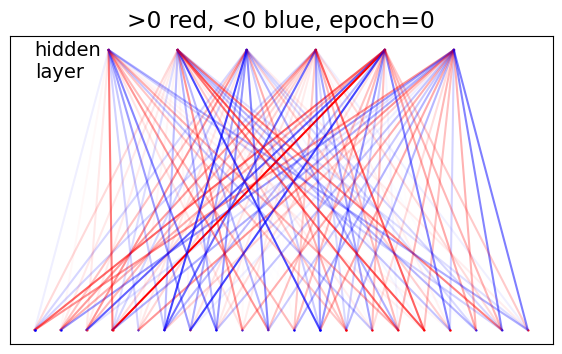

C:\Users\ricta\AppData\Local\Temp\ipykernel_9980\2047655505.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function


epoch = 0
epoch = 1
epoch = 2
epoch = 3
epoch = 4
epoch = 5
epoch = 6
epoch = 7
epoch = 8


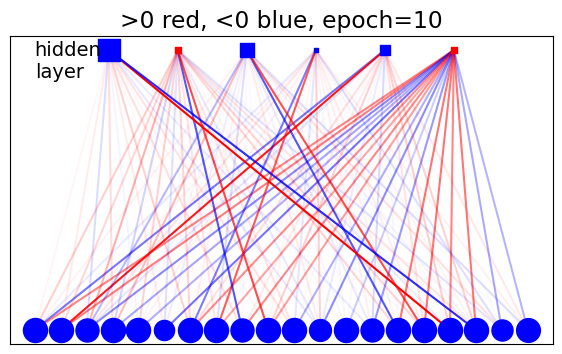

l_rate =  0.09900990099009903
epoch = 9
epoch = 10
epoch = 11
epoch = 12
epoch = 13
epoch = 14
epoch = 15
epoch = 16
epoch = 17
epoch = 18


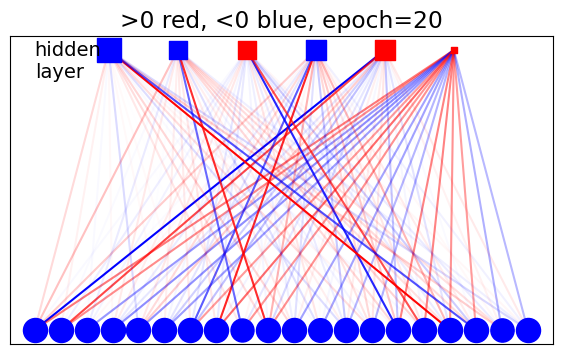

l_rate =  0.09803921568627452
epoch = 19
epoch = 20
epoch = 21
epoch = 22
epoch = 23
epoch = 24
epoch = 25
epoch = 26
epoch = 27
epoch = 28


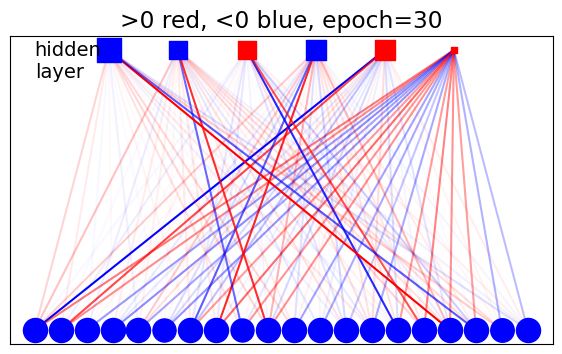

l_rate =  0.09708737864077671
epoch = 29
epoch = 30
epoch = 31
epoch = 32
epoch = 33
epoch = 34
epoch = 35
epoch = 36
epoch = 37
epoch = 38


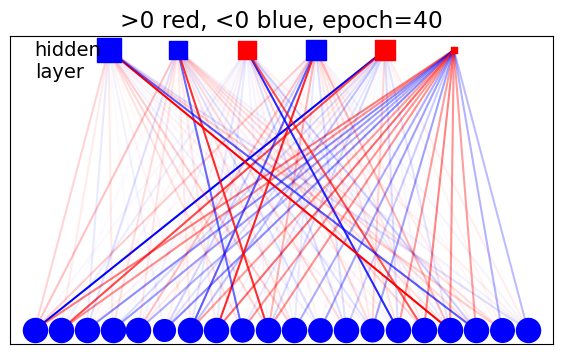

l_rate =  0.09615384615384616
epoch = 39


In [9]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)

# minibatch
mini, m = 500, 0

# Call the ADAM class
adam = AdamOptim()  # update of the learning rate every new epoch --- TODO
# learning rate
l_rate = 0.1      # initial learning rate
adam.eta = l_rate

# check if convergence ---- TODO: now stops after 1000 iterations 
converged = False
t = 1 

# CD-n iterations
n = 5

# train model
print('===================================================')
for epoch in range(40):
    # aggregate normalization of batch statistics and learning rate
    # l_rate_m = l_rate / mini
    l_rate_m = adam.eta / mini

    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # # positive CD phase: generating h # CD-1 here, so only one iteration
        h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        # negative CD phase: generating fantasy vf
        vf = activate(h,w.T,a,GAP)  # fantasy unit
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)

        # h = activate(v[k], w, b, GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
        # h0 = np.copy(h)
        # for _ in range(n):
        #     # positive CD phase: generating h # CD-n here, so n iterations
        #     # negative CD phase: generating fantasy vf
        #     vf = activate(h, w.T, a, GAP)  # fantasy unit
        #     # one more positive CD phase: generating fantasy h from fantasy vf 
        #     hf = activate(vf, w, b, GAP)
        #     h = np.copy(hf) 

        m += 1

        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with ADAM
            # dw, da, db = ADAM(...)        # gradient variables
            while not converged:
                w_0 = np.copy(w)
                E_i = energy(a, v[k], b, h, w)
                dw = -l_rate_m*(vh_data - vh_model) # -l_rate_m*
                da = -l_rate_m*(v_data - v_model)
                db = -l_rate_m*(h_data - h_model)
                # w_old = w.copy()  # useful if want to check-convergence
                w, a, b = adam.update(t, w=w, a=a, b=b, dw=dw, da=da, db=db)
                h = activate(v[k],w,b,GAP)  # change to h_f in case of CD-n, so a for loop in which the model is evaluated at time t=n
                # negative CD phase: generating fantasy vf
                vf = activate(h,w.T,a,GAP)  # fantasy unit
                # one more positive CD phase: generating fantasy h from fantasy vf 
                hf = activate(vf,w,b,GAP)
                
                # check if this is ok, so that we sum many times the same batch element or need to create a new array just for the ADAM part
                v_data  += v[k]
                v_model += vf
                h_data  += h    # h0
                h_model += hf
                vh_data += np.outer(v[k].T,h)
                vh_model+= np.outer(vf.T,hf)

                E_f = energy(a, v[k], b, h, w)
                
                if t == 1000:     #checkconvergence(w, w_0):   # to change: check-convergence # t == 1000
                    # print('stopped convergence after '+str(t)+' iterations')
                    break
                t += 1
            m = 0
            t = 1 
        
        else:
            v_data  += v[k]
            v_model += vf
            h_data  += h    # h0
            h_model += hf
            vh_data += np.outer(v[k].T,h)
            vh_model+= np.outer(vf.T,hf)
        
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    adam.eta = l_rate
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ', adam.eta)
    print("epoch =", epoch)

In [10]:
E_i, E_f

(-14737.06677159604, -14737.06650197806)

In [11]:
w[:3], a, b, dw[:3], da, db

(array([[  171.82399469,   244.85770861,   -27.08122348,   200.79567083,
         -1010.23436628,   528.52814145],
        [   78.83582146,   -20.93322695,   -68.2811861 ,   -14.25395299,
           729.13712728,   456.33582277],
        [  -83.42324877,  -128.25388313,    42.78949157,   -22.65366678,
            53.89118377,  -456.77407676]]),
 array([-371.36018518, -385.77107161, -403.81462138, -434.85205225,
        -407.1442904 , -244.21973699, -415.77042466, -518.83545962,
        -274.84039306, -431.77931617, -360.87155078, -283.86596172,
        -447.00300299, -266.17747726, -424.18711038, -406.26285585,
        -391.61023272, -467.91442803, -288.68050451, -334.19144053]),
 array([-385.8969703 , -171.77037966,  168.14769048, -211.51742428,
         222.069443  ,   20.11997444]),
 array([[-0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        ],
        [-0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        ],
        [

In [14]:
# Until now beta was 1; we put it now equal to 40, so very low temperature, to clean up points
ampl = 40.
# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate(h,w.T,a,ampl*GAP)
# difference between fantasy and data
diff = (v1 - v0)/2

def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

t=[i for i in range(N1)]
g = pd.Categorical(df[t]).codes # convert groups to indices  
df1.style.apply(
    lambda x: ['background-color: {}'.format("#FFCCCC") for i in g], 
    subset=[0,1,2,3, 8,9,10,11, 16,17,18,19 ]
)

C:\Users\ricta\AppData\Local\Temp\ipykernel_9980\2047655505.py:6: RuntimeWarning: overflow encountered in exp
  prob = 1./(1. + np.exp(-DE*act))     # updated sigmoid function


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
6,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
8,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
6,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
7,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
8,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0


In [13]:
# Programma che controlla se i dati sono giusti 

df0 = pd.DataFrame(v0[:N])
df1 = pd.DataFrame(((v1[:N]-vmin)/(1-vmin)).astype(int))

scores = 0 #fa +1 per ogni riga giusta
nBlocks = int(L/4)
#Ricordiamoci che il dataframe è storto, giusto perché questo programma non era abbasta complicato
# col - riga

for nRiga in range(N): 
    #Controlla se questa riga è con alternanza sinistra destra
    riga = df1.iloc[nRiga,:]
    positions = [] 
    positionsLettere = [] #scritti "destra" "sinistra"
    for block in range(nBlocks): # DSDSDSDS --> controlli che non si r
        blocchetto = riga[block*4:(block+1)*4]
        indice = 0
        for i in range(4):
            if blocchetto[block*4 + i] == 1:
                indice = i
        if indice < 2:
            positions.append(0) # 0 --> sinistra
            positionsLettere.append("sinistra ")
        else:
            positions.append(1) # 1 --> destra
            positionsLettere.append("destra ")
    corretto = True
    for indice in range(len(positions)-1): #per ogni 0 1 etc
        if positions[indice] == positions[indice+1]:
            corretto = False
    if corretto == True:
        scores += 1
    if corretto == False:
        print(nRiga, " è sbagliata")
        print(positionsLettere)
        
print("Score: ", scores/N)   

2  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
34  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
130  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
159  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
198  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
239  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
243  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
246  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
270  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
275  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
366  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
389  è sbagliata
['destra ', 'destra ', 'destra ', 'sinistra ', 'destra ']
432  è sbagliata
['sinistra ', 'sinistra ', 'destra ', 'destra ', 'destra ']
448  è sbagliata
['s